In [1]:
# Simple classification problem using the breast cancer dataset. 
# see: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29
# The soruce code is partially copied from 'Hands-on Machine Learning with Scikit-Learn 
# and Tensorflow', chapter 10.



import tensorflow as tf
import pandas
import numpy as np 
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

ImportError: No module named tensorflow

In [6]:
n_outputs = 2
n_features = 16
data = pandas.read_csv("cancer.csv", header=None)
mms = preprocessing.MinMaxScaler()
data=data.drop([0], axis=1) # drop the first column
Y=data.T[:1].T
X=data.T[1:].T.values
X=mms.fit_transform(X)

In [7]:
y=pandas.get_dummies(Y)
y=y.as_matrix()
labels = np.argmax(y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33)

In [8]:
from tensorflow.contrib.layers import fully_connected

Xvar = tf.placeholder(tf.float32, shape=(None, 30), name="Xvar")
yvar = tf.placeholder(tf.int64, shape=(None), name="yvar")
lr=0.01
with tf.name_scope("cancer_nn"):
    hidden1 = fully_connected(Xvar,40,  activation_fn=tf.nn.sigmoid)
    hidden2 = fully_connected(hidden1,15,activation_fn=tf.nn.sigmoid)
    logits= fully_connected(hidden2,2, activation_fn=tf.nn.softmax)
    
with tf.name_scope("loss"):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels= yvar, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(lr)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("pred"):
    correct = tf.nn.in_top_k(logits,yvar,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver=tf.train.Saver()


# execution
n_epochs=1400
batch_size=10

tr_acc=[]
te_acc=[]
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(int(len(X_train) * 1.0 /batch_size)):
            ind = np.random.permutation(len(X_train))[:batch_size]
            X_batch = X_train[ind]
            y_batch = y_train[ind]
            sess.run(training_op, feed_dict={Xvar:X_batch, yvar : y_batch})
        if epoch % 3 == 0:
            acc_train = accuracy.eval(feed_dict={Xvar: X_batch, yvar: y_batch})
            acc_test = accuracy.eval(feed_dict={Xvar: X_test, yvar: y_test})
            tr_acc.append(acc_train)
            te_acc.append(acc_test)
            print(epoch, "training acc: ",acc_train, "test acc: ",acc_test)
    save_path = saver.save(sess,"./cancermodle.ckpt")

(0, 'training acc: ', 0.8, 'test acc: ', 0.55851066)
(3, 'training acc: ', 0.8, 'test acc: ', 0.55851066)
(6, 'training acc: ', 0.5, 'test acc: ', 0.55851066)
(9, 'training acc: ', 0.6, 'test acc: ', 0.55851066)
(12, 'training acc: ', 0.5, 'test acc: ', 0.55851066)
(15, 'training acc: ', 0.5, 'test acc: ', 0.55851066)
(18, 'training acc: ', 0.5, 'test acc: ', 0.55851066)
(21, 'training acc: ', 0.2, 'test acc: ', 0.55851066)
(24, 'training acc: ', 0.6, 'test acc: ', 0.55851066)
(27, 'training acc: ', 0.6, 'test acc: ', 0.55851066)
(30, 'training acc: ', 0.8, 'test acc: ', 0.55851066)
(33, 'training acc: ', 0.5, 'test acc: ', 0.55851066)
(36, 'training acc: ', 0.6, 'test acc: ', 0.55851066)
(39, 'training acc: ', 0.7, 'test acc: ', 0.55851066)
(42, 'training acc: ', 0.5, 'test acc: ', 0.55851066)
(45, 'training acc: ', 0.8, 'test acc: ', 0.55851066)
(48, 'training acc: ', 0.8, 'test acc: ', 0.55851066)
(51, 'training acc: ', 0.7, 'test acc: ', 0.55851066)
(54, 'training acc: ', 0.6, 'tes

(459, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(462, 'training acc: ', 0.9, 'test acc: ', 0.92021275)
(465, 'training acc: ', 0.9, 'test acc: ', 0.92021275)
(468, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(471, 'training acc: ', 0.9, 'test acc: ', 0.92021275)
(474, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(477, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(480, 'training acc: ', 1.0, 'test acc: ', 0.9255319)
(483, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(486, 'training acc: ', 0.9, 'test acc: ', 0.92021275)
(489, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(492, 'training acc: ', 1.0, 'test acc: ', 0.92021275)
(495, 'training acc: ', 1.0, 'test acc: ', 0.9255319)
(498, 'training acc: ', 0.8, 'test acc: ', 0.9255319)
(501, 'training acc: ', 0.9, 'test acc: ', 0.9255319)
(504, 'training acc: ', 0.9, 'test acc: ', 0.9255319)
(507, 'training acc: ', 0.9, 'test acc: ', 0.9255319)
(510, 'training acc: ', 1.0, 'test acc: ', 0.9255319)
(513, 'training a

(924, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(927, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(930, 'training acc: ', 0.9, 'test acc: ', 0.9787234)
(933, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(936, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(939, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(942, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(945, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(948, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(951, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(954, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(957, 'training acc: ', 0.9, 'test acc: ', 0.9734042)
(960, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(963, 'training acc: ', 0.9, 'test acc: ', 0.9734042)
(966, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(969, 'training acc: ', 1.0, 'test acc: ', 0.9787234)
(972, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(975, 'training acc: ', 0.9, 'test acc: ', 0.9734042)
(978, 'training acc: ', 1.0,

(1380, 'training acc: ', 0.9, 'test acc: ', 0.9787234)
(1383, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(1386, 'training acc: ', 1.0, 'test acc: ', 0.9787234)
(1389, 'training acc: ', 1.0, 'test acc: ', 0.9787234)
(1392, 'training acc: ', 0.9, 'test acc: ', 0.9734042)
(1395, 'training acc: ', 1.0, 'test acc: ', 0.9734042)
(1398, 'training acc: ', 1.0, 'test acc: ', 0.9734042)


In [10]:
int(len(X_train) * 1.0 /batch_size)
X_train.size

11430

In [11]:
import matplotlib.pyplot as plt

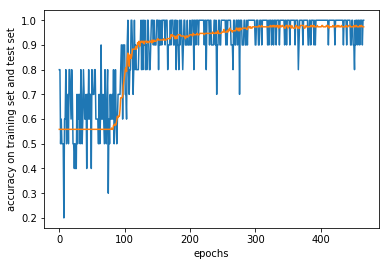

In [12]:
r = range(len(tr_acc))
plt.plot(r,tr_acc,r,te_acc)
plt.ylabel('accuracy on training set and test set')
plt.xlabel("epochs")
plt.show()
